The RSS value represents one of the parameter of the GA and as such, it too can be tuned. The values tested for this parameter were 1, 2, 5 and 10. 

In a similar fashion to \cite{Goncalves2013}, each experiment was conducted as follows: at each generation (1) the GA evaluates the fitness of all candidate individuals in the population using the subset of the training set (k time periods where k is the RSS parameter), (2) the fitness of the best individual is logged as 'training fitness' (3) this best individual is evaluated on the test set (20 new unseen time periods) and their fitness is logged as 'test fitness'. 

Summary:
- training fitness is the fitness of the best individual - evaluated on the training set (k time periods, k is RSS parameter); 
- testing fitness is the fitness of that same individual in the testing set (N time periods). For each generation, the test fitness is the fitness (avg response time across all N time periods) of the best individual in the population (that with best training fitness).

In [1]:
import os
import pickle
import networkx as nx
import matplotlib.ticker as ticker
import imageio
import matplotlib.pyplot as plt
import seaborn as sns
print(os.getcwd())
import pandas as pd

/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/GA1_experiment


In [2]:
from deap import base
from deap import creator
from deap import tools

creator.create("Fitness", base.Fitness, weights=(-1.0,)) 
creator.create("Individual", list, fitness=creator.Fitness, test_fitness=creator.Fitness)
"""
import numpy as np
import random


MAX_NUM_AGENTS = 5
NUM_PATROL_BEATS = 10

def gen_random_parameters():
    global MAX_NUM_AGENTS, NUM_PATROL_BEATS
    list_num_agents_scas = np.zeros((NUM_PATROL_BEATS,), dtype=int)

    # get a random number of beats to staff
    k = random.randint(1, MAX_NUM_AGENTS)
    #print('staffing {} beats'.format(k))
    # randomly choose k indexed of beats to staff without replacement
    staffed_indexes=random.sample(range(NUM_PATROL_BEATS), k)
    # replace
    for index in staffed_indexes:
        list_num_agents_scas[index] = 1

    return tuple(list_num_agents_scas)
    
    
## TOOLBOX
toolbox = base.Toolbox()
# Attribute generator
toolbox.register("attribute_generator", gen_random_parameters)
#toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
# NB: initRepeat if same creation function for n = 131 genes (parameters)
# But here it is initIterate for just once because the different genes are related to each other (max 77 of them will have a 1)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attribute_generator) 
#toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, NUM_PATROL_BEATS)

toolbox.register("population", tools.initRepeat, list, toolbox.individual) 

toolbox.register("selectBest", tools.selBest)"""

'\nimport numpy as np\nimport random\n\n\nMAX_NUM_AGENTS = 5\nNUM_PATROL_BEATS = 10\n\ndef gen_random_parameters():\n    global MAX_NUM_AGENTS, NUM_PATROL_BEATS\n    list_num_agents_scas = np.zeros((NUM_PATROL_BEATS,), dtype=int)\n\n    # get a random number of beats to staff\n    k = random.randint(1, MAX_NUM_AGENTS)\n    #print(\'staffing {} beats\'.format(k))\n    # randomly choose k indexed of beats to staff without replacement\n    staffed_indexes=random.sample(range(NUM_PATROL_BEATS), k)\n    # replace\n    for index in staffed_indexes:\n        list_num_agents_scas[index] = 1\n\n    return tuple(list_num_agents_scas)\n    \n    \n## TOOLBOX\ntoolbox = base.Toolbox()\n# Attribute generator\ntoolbox.register("attribute_generator", gen_random_parameters)\n#toolbox.register("attr_bool", random.randint, 0, 1)\n\n# Structure initializers\n# NB: initRepeat if same creation function for n = 131 genes (parameters)\n# But here it is initIterate for just once because the different genes ar

In [3]:
"""pop = toolbox.population(n=2)
pop"""

'pop = toolbox.population(n=2)\npop'

In [4]:
def get_df_for_scenario(scenario_num) :
    """UNUSED FOR THIS EXPERIMENT Function used to create a df of the evaluation results of both the GA and the simple configs 
    (evaluated on testing_set_scenario1 and testing_set_scenario1) from 2019"""
    
    # open the file for the chosen scenario
    with open('../../Benchmark_simple_configs/dict_pair_benchmark_scenario{}.pkl'.format(scenario_num), 'rb') as f:
        dict_pair_inc = pickle.load(f)
    
    """#### REMOVE THIS ####
    with open('results_validation_scenario{}.pkl'.format(str(scenario_num)), 'rb') as f:
        list_of_shift_dicts = pickle.load(f)

    list_num_agents = [2,3,4,5,6,7] 
    dict_pair = {}
    for num_agents in list_num_agents:
        list_dfs_for_pair = [shift_dict[num_agents] for shift_dict in list_of_shift_dicts ] # columns = incidents.columns
        dict_pair[num_agents] = pd.concat(list_dfs_for_pair, ignore_index=True)
    dict_pair_inc = dict_pair
    ########"""
    list_num_agents = [2,3,4,5,6,7] 
    
    # Initialise the dataframe 
    df2 = pd.DataFrame()

    fail_threshold = 15

    for num_agents in list_num_agents:

        if len(df2) == 0:
            df2 = dict_pair_inc[num_agents].copy()

        incidents = dict_pair_inc[num_agents]
        # get the new incidents if any
        common = incidents.merge(df2,on=['Index'])
        new_incidents = incidents[(~incidents.Index.isin(common.Index))]
        # add new incidents to df2
        df2 = pd.concat([df2, new_incidents])

        df2['Dispatch_time_{}'.format(num_agents)] = dict_pair_inc[num_agents]['Dispatch_time']
        df2['Travel_time_{}'.format(num_agents)] = dict_pair_inc[num_agents]['Travel_time']
        df2['Response_time_{}'.format(num_agents)] = df2['Dispatch_time_{}'.format(num_agents)] + df2['Travel_time_{}'.format(num_agents)]
        
    # GET GA CHOSEN CONFIG
    with open('list_of_shift_dfs_scenario{}.pkl'.format(scenario_num), 'rb') as f:
        list_dfs=pickle.load(f)
    
    df = pd.concat(list_dfs, ignore_index=True)
    df2['Response_time_GA'] = df['Dispatch_time'] + df['Travel_time']
    
    
    return df2



In [5]:
os.chdir('/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/GA1_experiment/Single_obj/Tuning_experiments/')
print(os.getcwd())

/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/GA1_experiment/Single_obj/Tuning_experiments


In [6]:
RSS= 5
with open('RSS{}/full_logbook_file_scenario1_RSS{}'.format(RSS, RSS),'rb') as f:
    logbook = pickle.load(f)
    print(logbook)

       	   	                	            	    num_vehicles   
       	   	                	            	-------------------
run_num	gen	training_fitness	test_fitness	min	avg   	max
1      	0  	3.20109         	3.21803     	1  	34.825	77 
1      	1  	3.21196         	3.3429      	8  	57.975	82 
1      	2  	3.13253         	3.28402     	53 	69.525	78 
1      	3  	3.13855         	3.25535     	66 	73.65 	77 
1      	4  	3.07634         	3.24967     	68 	73.15 	77 
1      	5  	3.07634         	3.26369     	62 	73.375	80 
1      	6  	3.1369          	3.21151     	69 	73.475	78 
1      	7  	3.12329         	3.2915      	68 	73.575	78 
1      	8  	3.07895         	3.23955     	69 	74.275	81 
1      	9  	3.08553         	3.15844     	68 	74.95 	82 
1      	10 	3.03597         	3.18207     	70 	74.55 	78 
1      	11 	3.03165         	3.19073     	70 	74.45 	77 
1      	12 	3.03165         	3.24318     	68 	73.9  	79 
1      	13 	3.03165         	3.15416     	70 	74.1  	79 
1      	14 	2.95425  

In [7]:
RSS = 5

def get_logbooks_across_runs(RSS) :
    logbook_df = pd.DataFrame()
    for run_num in range(1,5) :
        with open('RSS{}/logbook_file_scenario1_RSS{}_run{}'.format(RSS, RSS, run_num), 'rb') as f:
            logbook = pickle.load(f)
            logbook_df = pd.concat([logbook_df, pd.DataFrame(logbook)])
    return logbook_df

logbook_df = get_logbooks_across_runs(RSS)
logbook_df

,run_num,gen,time,training_fitness,test_fitness
0,1,0,2022-06-07 11:00:56.406536,3.201087,3.218035
1,1,1,2022-06-07 11:29:18.439004,3.211957,3.342896
2,1,2,2022-06-07 11:57:58.123919,3.132530,3.284016
3,1,3,2022-06-07 12:25:44.674913,3.138554,3.255348
4,1,4,2022-06-07 12:54:08.748474,3.076336,3.249671
...,...,...,...,...,...
79,4,16,2022-06-08 23:05:50.280357,3.044199,3.178161
80,4,17,2022-06-08 23:33:06.425987,3.099448,3.184350
81,4,18,2022-06-09 00:00:06.879882,3.133333,3.148489
82,4,19,2022-06-09 00:28:22.404156,2.960938,3.207921


Time at each generation

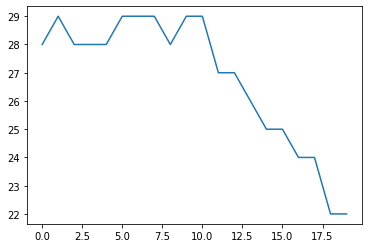

In [8]:
with open('RSS{}/logbook_file_scenario1_RSS{}_run{}'.format(RSS, RSS, 1), 'rb') as f:
    logbook = pickle.load(f)
        
#list_times = logbook.chapters['training_fitness'].select('time')
list_times = logbook.select('time')


# Calculating difference list in minutes
diff_list = []
for x, y in zip(list_times[0::], list_times[1::]):
    diff_list.append(round((y-x).total_seconds()/60))
plt.plot(diff_list)

In [9]:
df['gen'] = df['gen'].astype(object)

NameError: name 'df' is not defined

RSS = 1 : On average 20 minutes between generation
RSS = 2 : On average 21 minutes between generation
RSS = 5 : On average 25 minutes between generation
RSS = 10 : On average 35 minutes between generation

## Visualise the learning

In [10]:
import seaborn as sns
import numpy as np
def visualise_learning(scenario_num, RSS, ax) :

    logbook_df = get_logbooks_across_runs(RSS)
    logbook_df.rename(columns = {'gen':'Generation', 'training_fitness':'Training Fitness', 'test_fitness': 'Test Fitness'}, inplace = True)

    # prepare the dataframe: from wide to long format
    df = pd.melt(logbook_df, id_vars=['Generation'], value_vars=['Training Fitness', 'Test Fitness'])
    df['Generation'] = df['Generation'].astype(str)
    df.rename(columns = {'variable':'Type', 'value': 'Fitness'}, inplace = True)

    figure = sns.lineplot(data=df, x="Generation", y="Fitness", ci='sd', hue='Type', ax=ax)
    
    ax.set_title('RSS {}'.format(RSS), fontsize = 25, )
    
    ax.set_ylim(bottom=2.5, top=4)
    
    ax.set_xticklabels(np.arange(0, 21, 1) ,rotation=0,  fontsize=20)

    ax.set_xlabel('Generation', fontsize = 20, labelpad=15)
    
    ax.set_ylabel('Fitness', fontsize = 20)
    
    ax.tick_params(axis='y', labelsize=20)
    
    leg = ax.get_legend()
    leg.get_texts()[0].set_fontsize(20)

    
    
    # remove legend title
    figure.legend_.set_title(None)

    return figure

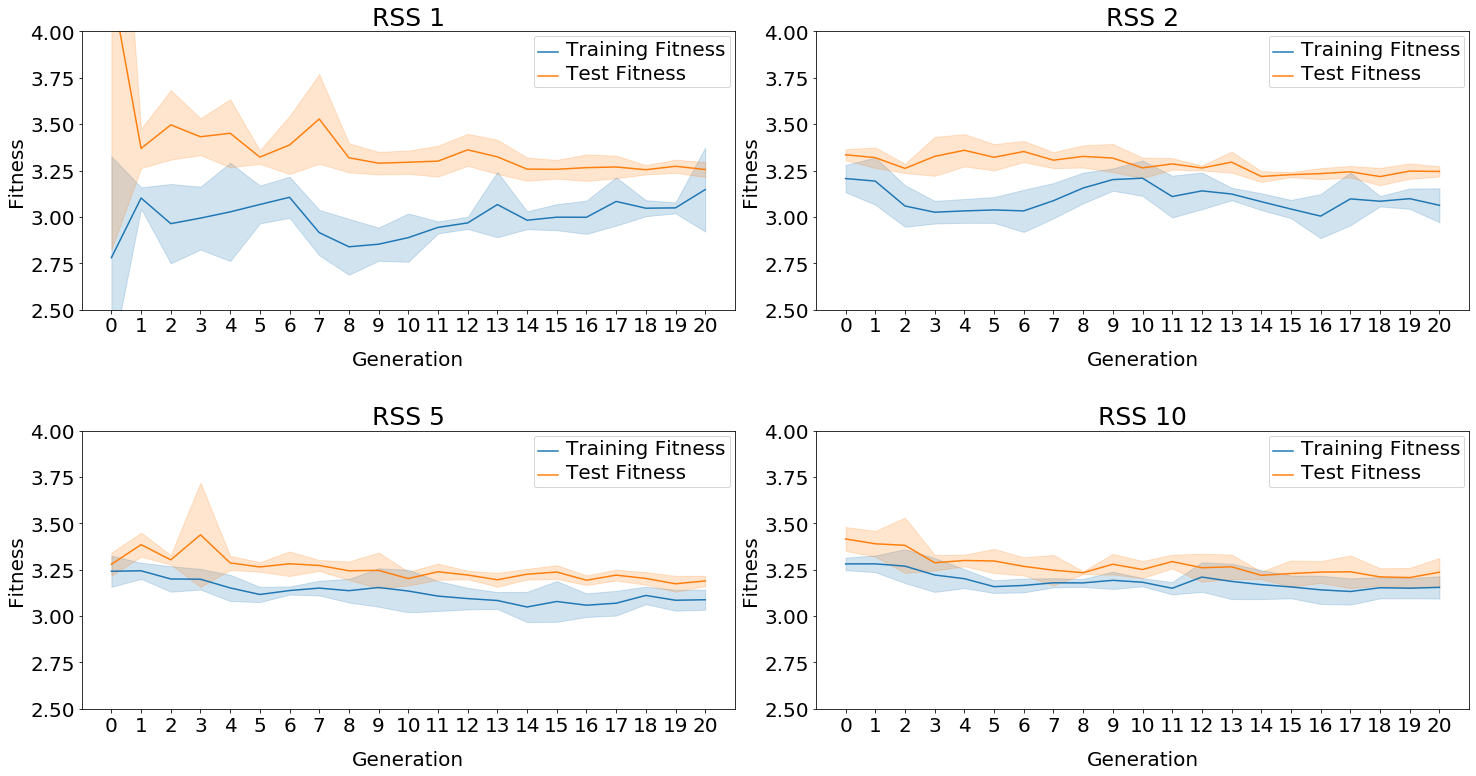

In [11]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(2, 2, figsize=(20,10))
f.tight_layout(h_pad=10, w_pad=5)

a = visualise_learning(scenario_num=1, RSS=1, ax=axes[0,0])

b = visualise_learning(scenario_num=1, RSS=2, ax=axes[0,1])

c = visualise_learning(scenario_num=1, RSS=5, ax=axes[1,0])

d = visualise_learning(scenario_num=1, RSS=10, ax=axes[1,1])


plt.savefig('../../../Images/GA/Tuning_experiment_learning.png', bbox_inches = 'tight')


plt.show()

If the distance between training and testing fitnesses remain constant throughout the learning. If the gap widens, there is overfitting.

Note: in the paper, they used 30 runs average for training_fitness and test_fitness. Here I only do 1 run! There will be variability due to the stachasticity of GAs and ABMs!

There is also stochasticity in the initial population!

## Visualise loss of diversity in population

In [12]:
def visualise_loss_diversity(scenario_num, RSS, ax) :

    df = pd.DataFrame()
    
    for run_num in range(1,5) :
        for gen in range(0, len(logbook)):
            with open('RSS{}/population_gen_{}_scenario1_RSS{}_run{}'.format(RSS, gen, RSS, run_num), 'rb') as f:
                test = pickle.load(f)
                num_unique_ind = len([list(x) for x in set(tuple(x) for x in test)])
                df = df.append({'run_num': run_num, 'gen': gen, 'num_unique_ind' : num_unique_ind}, ignore_index = True)
                # prepare the dataframe: from wide to long format
                df['gen'] = df['gen'].astype(int)
                #df.rename(columns = {'gen':'Generation', 'num_unique_ind': 'Number of unique individuals'}, inplace = True)

    
    line1 = sns.lineplot(data=df, x="gen", y="num_unique_ind", ci='sd', ax=ax)
    
    ax.set_title('RSS {}'.format(RSS), fontsize = 25, )
    
    #ax.set_ylim(bottom=2.5, top=4)
    
    ax.set_xticks(range(21)) # <--- set the ticks first
    ax.set_xticklabels(np.arange(0, 21, 1) ,rotation=0,  fontsize=20)

    #ax.set_xticklabels(np.arange(0, 21, 1) ,rotation=0,  fontsize=15)

    ax.set_xlabel('Generation', fontsize = 20, labelpad=15)
    
    ax.set_ylabel('Number of unique individuals', fontsize = 20)
    
    ax.tick_params(axis='y', labelsize=20)
    
    return line1

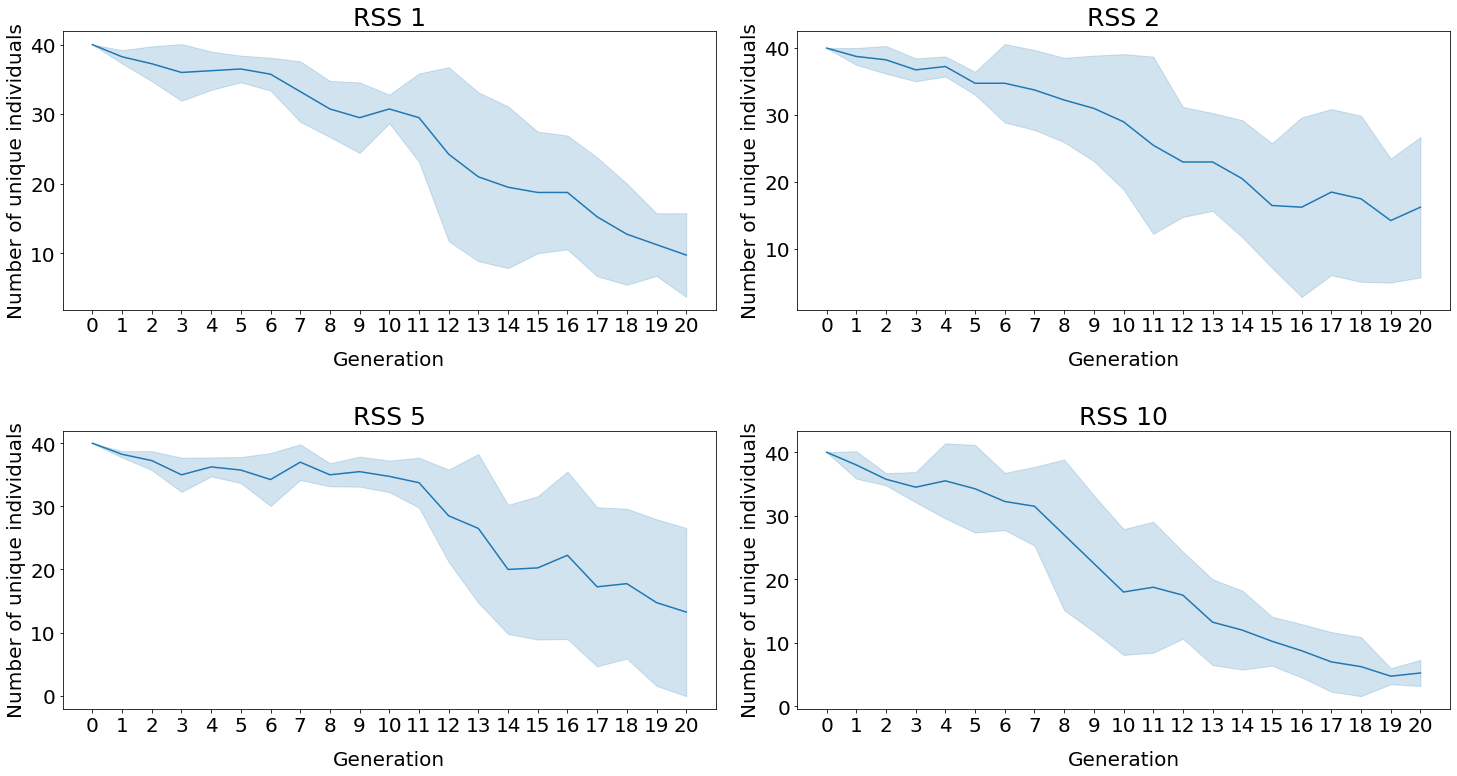

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(20,10))
fig.tight_layout(h_pad=10, w_pad=5)

a = visualise_loss_diversity(scenario_num=1, RSS=1, ax=axes[0,0])

b = visualise_loss_diversity(scenario_num=1, RSS=2, ax=axes[0,1])

c = visualise_loss_diversity(scenario_num=1, RSS=5, ax=axes[1,0])

d = visualise_loss_diversity(scenario_num=1, RSS=10, ax=axes[1,1])

plt.savefig('../../../Images/GA/Tuning_experiment_diversity.png', bbox_inches = 'tight')


plt.show()

## Visualise best individual

In [47]:
with open('best_ind_scenario2', 'rb') as f:
    best_ind=pickle.load(f)
best_ind

(1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0)

In [48]:
sum(best_ind)

77

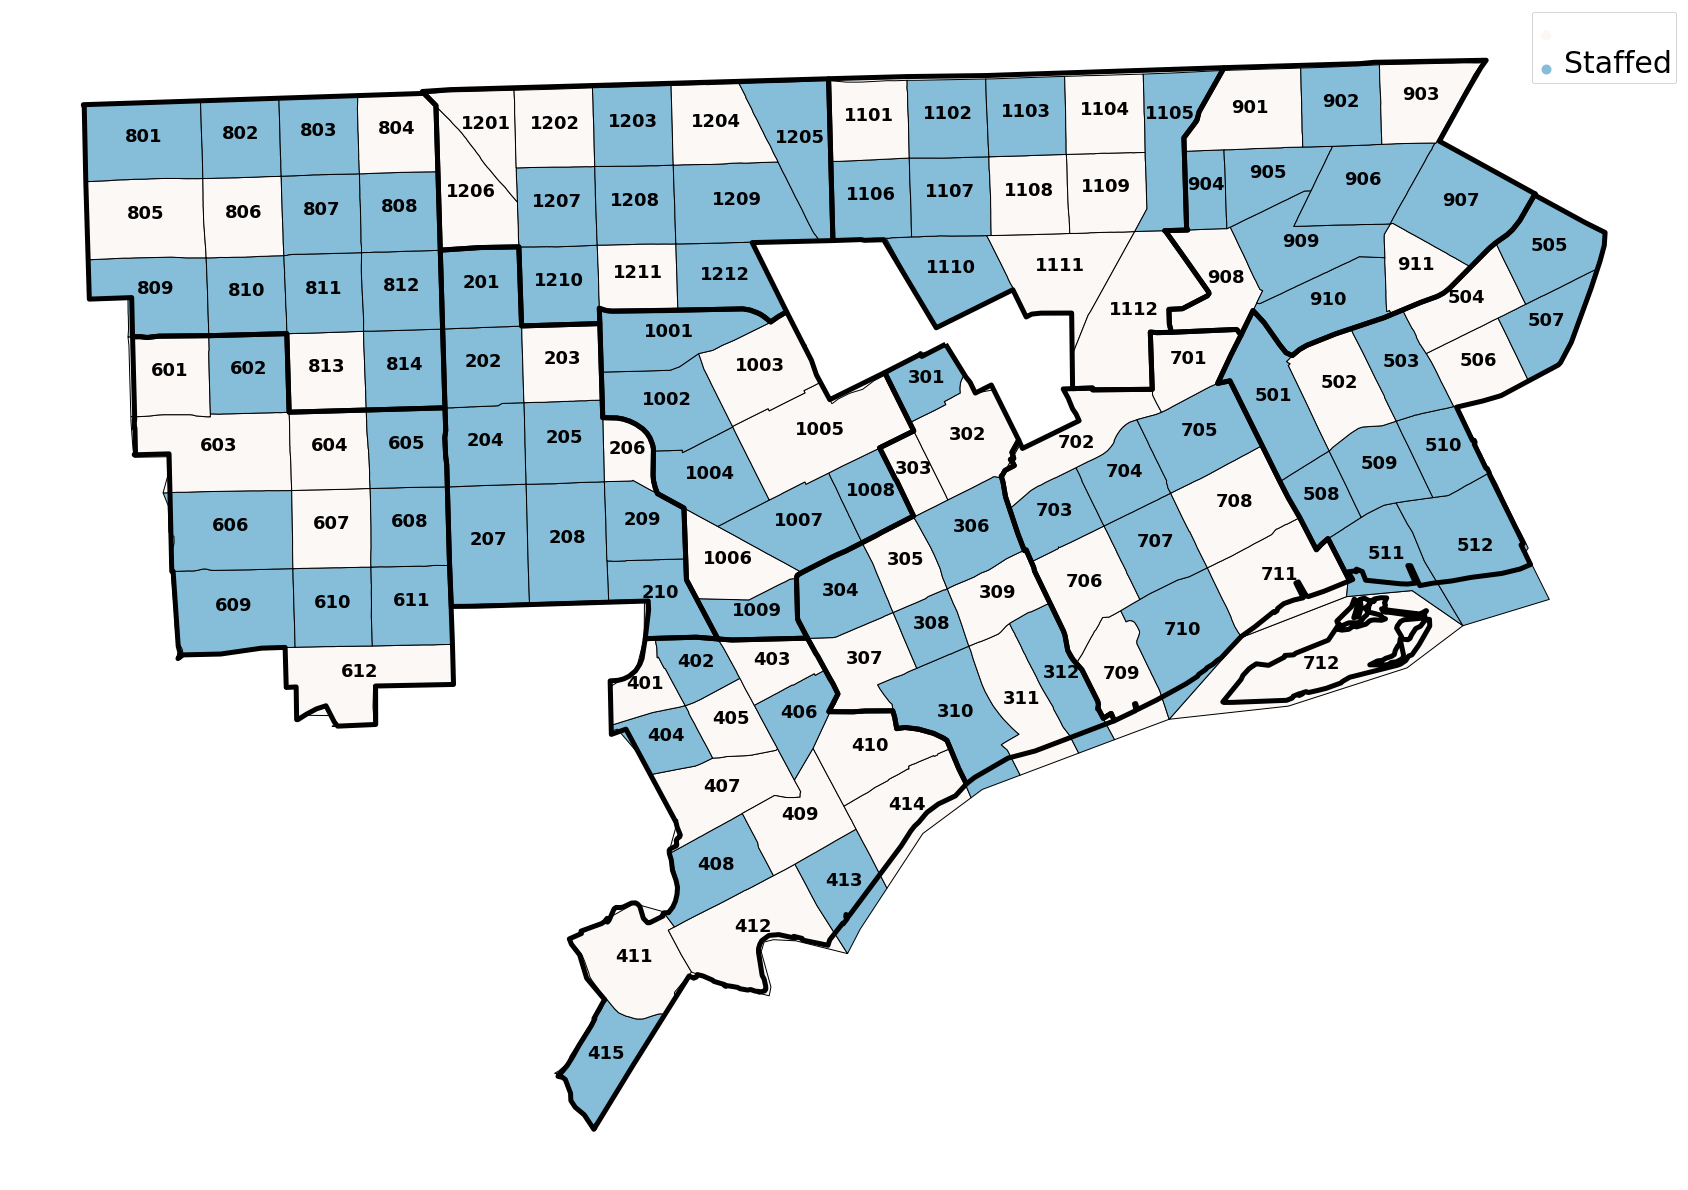

In [50]:
### LINEAR SCALE
# https://www.axismaps.com/guide/choropleth
import geopandas as gpd


precincts = gpd.read_file('../../../Data/DPD_Precincts/dpd_precincts.shp')

scas = gpd.read_file('../../../Data/DPD_Scout_Car_Areas-shp/DPD_SCAs_preprocessed.shp')
scas.loc[:,['name']] = scas.name.astype('int64')
#scas = scas.join(num_inc_df, on = 'name')
# create new column with has_patrol (config)
scas['has_patrol'] = best_ind
scas['has_patrol'] = scas['has_patrol'].astype('str')


import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


# create simple linear colormap that maps grey to blue
cmap = LinearSegmentedColormap.from_list(
    'mycmap', [(0, '#fcf8f6'), (1, '#86beda')])


fig, ax = plt.subplots(1, figsize=(30, 30))
scas.plot(ax=ax, column='has_patrol', edgecolor= 'black', legend=True, cmap=cmap)
#scas.apply(lambda x: ax.annotate(s=int(x['name']), xy=x.geometry.centroid.coords[0], ha='center', fontfamily = 'sans-serif', weight='bold', fontsize=18),axis=1);

for index, sca in scas.iterrows():
    if sca['name'] == 712 :
        ax.annotate(int(sca['name']), # this is the text
                    xy=sca.geometry.centroid.coords[0],
                    weight='bold', 
                    fontsize=18,
                    textcoords="offset points", # how to position the text
                    xytext=(0,-15),
                    ha='center')
    elif sca['name'] == 1105 :
            ax.annotate(int(sca['name']), # this is the text
                        xy=sca.geometry.centroid.coords[0],
                        weight='bold', 
                        fontsize=18,
                        textcoords="offset points", # how to position the text
                        xytext=(0,25),
                        ha='center')
    elif sca['name'] == 702 :
            ax.annotate(int(sca['name']), # this is the text
                        xy=sca.geometry.centroid.coords[0],
                        weight='bold', 
                        fontsize=18,
                        textcoords="offset points", # how to position the text
                        xytext=(0,-10),
                        ha='center')
    elif sca['name'] == 908 :
            ax.annotate(int(sca['name']), # this is the text
                        xy=sca.geometry.centroid.coords[0],
                        weight='bold', 
                        fontsize=18,
                        textcoords="offset points", # how to position the text
                        xytext=(10,0),
                        ha='center')
    else : 
        ax.annotate(int(sca['name']), # this is the text
                        xy=sca.geometry.centroid.coords[0],
                        weight='bold', 
                        fontsize=18,
                        ha='center')
            
            


#Precincts
precincts.boundary.plot(ax=ax, linewidth = 5, color = 'black', zorder = 1)

leg = ax.get_legend()
#leg.set_title('Staffed')
leg.get_texts()[0].set_fontsize('30')
leg.get_texts()[0].set_text('')

leg.get_texts()[1].set_fontsize('30')
leg.get_texts()[1].set_text('Staffed')

## LEGEND COLORBAR
"""sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=scas['num_inc_per_day_per_area'].min(), vmax=scas['num_inc_per_day_per_area'].max()))
cbar = plt.colorbar(sm, fraction=0.025, pad=0.02, orientation= 'horizontal')
cbar.ax.tick_params(labelsize=25)
cbar.set_label(label='Average daily number of historical crimes per km2',size=25)
 """

ax.axis('off')

#plt.savefig('./Images/CFS_precincts.png', bbox_inches = 'tight')

#move legend to an empty space

plt.savefig('../../../Images/GA_single_obj_best_ind_map_scenario2.png', bbox_inches = 'tight')

plt.show()

## Compare to simple config

Especially : compare the 7-agent config based on historical crimes versus the 7 agent config produced by the GA (or 8 agents??)

In [30]:
os.getcwd()

'/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/GA1_experiment/Single_obj/Scenario2'

In [31]:
# SCENARIO 1

In [32]:

os.chdir('/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/GA1_experiment/Single_obj/Scenario1')
df2_scenario2 = get_df_for_scenario(1)

filter_col = ["Response_time_2", 'Response_time_3', 'Response_time_4', 'Response_time_5', 'Response_time_6', 'Response_time_7', 'Response_time_GA']
df3 = df2_scenario2[filter_col]
df3.columns = ['2', '3', '4', '5', '6', '7', 'GA']
df3

,2,3,4,5,6,7,GA
0,4.0,2.0,2.0,2.0,2.0,2,2
1,5.0,5.0,5.0,5.0,5.0,5,3
2,6.0,8.0,6.0,5.0,5.0,5,2
3,2.0,2.0,2.0,2.0,2.0,2,2
4,5.0,5.0,4.0,3.0,3.0,3,3
...,...,...,...,...,...,...,...
3744,6.0,4.0,4.0,4.0,4.0,4,4
3745,8.0,5.0,6.0,6.0,5.0,3,3
3746,2.0,2.0,2.0,2.0,2.0,2,4
3747,4.0,4.0,4.0,3.0,3.0,3,3


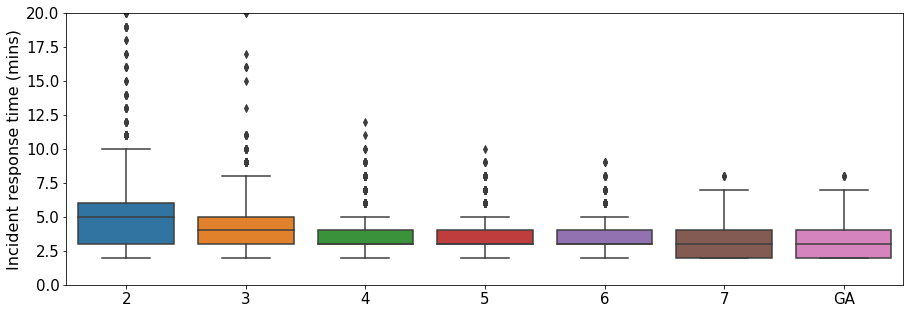

In [33]:

# plot the boxplot 
f, ax = plt.subplots(1, figsize=(15, 5))

## DISPATCH

ax = sns.boxplot(data=df3, ax = ax)


#f.suptitle('Distribution of incident travel times with various values of time saving threshold for redispatching on the fly', fontsize=20)


ax.set_xticklabels(ax.get_xticklabels(),rotation=0,  fontsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.set(xlabel=None)


ax.set_ylabel('Incident response time (mins)', fontsize = 16)


ax.set_ylim(0,20)

#plt.savefig('../Images/SA_timeSaving.png', bbox_inches = 'tight')


plt.show()

In [34]:

os.chdir('/Users/natachachenevoy/Documents/GitHub/ABM-Detroit-Police-Dispatch/GA1_experiment/Single_obj/Scenario2')
df2_scenario2 = get_df_for_scenario(2)

filter_col = ["Response_time_2", 'Response_time_3', 'Response_time_4', 'Response_time_5', 'Response_time_6', 'Response_time_7', 'Response_time_GA']
df3 = df2_scenario2[filter_col]
df3.columns = ['2', '3', '4', '5', '6', '7', 'GA']
df3

,2,3,4,5,6,7,GA
0,6.0,6.0,6.0,6.0,6.0,6,2
1,6.0,4.0,4.0,4.0,4.0,3,3
2,2.0,2.0,2.0,2.0,2.0,2,2
3,4.0,4.0,4.0,4.0,4.0,4,3
4,6.0,6.0,6.0,6.0,3.0,3,3
...,...,...,...,...,...,...,...
8967,3.0,3.0,3.0,3.0,3.0,3,3
8968,2.0,3.0,2.0,3.0,3.0,3,3
8969,3.0,3.0,3.0,3.0,3.0,3,2
8970,4.0,4.0,4.0,5.0,5.0,5,3


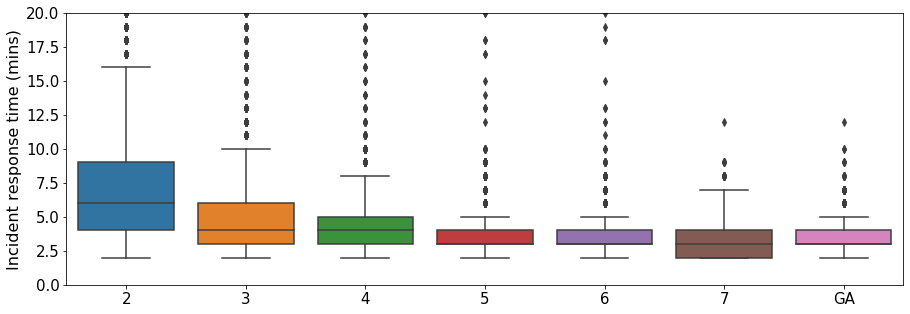

In [35]:

# plot the boxplot 
f, ax = plt.subplots(1, figsize=(15, 5))

## DISPATCH

ax = sns.boxplot(data=df3, ax = ax)


#f.suptitle('Distribution of incident travel times with various values of time saving threshold for redispatching on the fly', fontsize=20)


ax.set_xticklabels(ax.get_xticklabels(),rotation=0,  fontsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.set(xlabel=None)


ax.set_ylabel('Incident response time (mins)', fontsize = 16)


ax.set_ylim(0,20)

#plt.savefig('../Images/SA_timeSaving.png', bbox_inches = 'tight')


plt.show()

This shows that the GA-chosen config is performing as well as the simple config with 7 agents in each precinct (deployed to the hottest SCAs of each precinct based on last year's worth of data, so it's similar to the GA training on 2018 data!) WHEN LOOKING AT RESPONSE TIME ALONE. 

Comparing both maps would be interesting (where they are recommended to be sent but not the same number of agents). The first algorithm makes decision based on the location of historical crimes (density of historical crime for the past year PROACTIVE DEMAND) while the GA only looks at improving response time (REACTIVE DEMAND)


We were here looking at response time alone and, predictably, the GA learns that those configs with high number of agents lead to better response time. Where the GA is more informative is when it comes to knowing exactely WHICH SCA to send those 77 agents. But by looking at the map, we see that it's pretty much the same as sending resources to historical hot spots. Didn't need a GA for this, just a simple ABM combines with some historical crime data! (IS THAT TRUE?) 

HOWEVER in the real world there are other things to consider than just respponse tine alone when making such deployement decisions.
1. the number of agents comes with a cost, 
2. the placement of these agents may have impacts on 


multi-objectives, something that the simple config based on historical crimes cannot tell us: what is the tradeoff in other metrics when chosing to send resources there as opposed to some other sca?

In [206]:
with open('list_of_shift_dfs_scenario2.pkl', 'rb') as f:
    list_dfs=pickle.load(f)

df = pd.concat(list_dfs, ignore_index=True)


,Index,Precinct,Patrol_beat,Date_Time,Real_dispatch_time,Real_travel_time,Dispatch_time,Travel_time
0,162927,6,602,2019-12-15 00:02:37,0.3,8.1,1,1.0
1,162928,5,503,2019-12-15 00:09:05,1.2,6.1,1,2.0
2,162929,2,208,2019-12-15 00:27:42,1.7,2.9,1,1.0
3,162930,10,1008,2019-12-15 00:56:15,1.8,3.3,1,2.0
4,162931,4,411,2019-12-15 01:00:34,0.6,8.4,1,5.0
...,...,...,...,...,...,...,...,...
8967,162832,7,705,2019-12-14 07:44:22,0.8,3.5,1,2.0
8968,162833,12,1210,2019-12-14 07:53:12,1.6,3.5,1,2.0
8969,162834,5,504,2019-12-14 07:54:16,1.7,6.1,1,1.0
8970,162835,8,807,2019-12-14 07:54:38,1.6,6.0,2,2.0


In [179]:
with open('../../Benchmark_simple_configs/dict_pair_benchmark_scenario2.pkl', 'rb') as f:
    list_dfs_benchmark=pickle.load(f)
list_dfs_benchmark



{2:        Index Precinct Patrol_beat           Date_Time  Real_dispatch_time  \
 0     162927        6         602 2019-12-15 00:02:37                 0.3   
 1     162928        5         503 2019-12-15 00:09:05                 1.2   
 2     162929        2         208 2019-12-15 00:27:42                 1.7   
 3     162930       10        1008 2019-12-15 00:56:15                 1.8   
 4     162931        4         411 2019-12-15 01:00:34                 0.6   
 ...      ...      ...         ...                 ...                 ...   
 8967  162832        7         705 2019-12-14 07:44:22                 0.8   
 8968  162833       12        1210 2019-12-14 07:53:12                 1.6   
 8969  162834        5         504 2019-12-14 07:54:16                 1.7   
 8970  162835        8         807 2019-12-14 07:54:38                 1.6   
 8971  162836        9         909 2019-12-14 07:59:55                 0.8   
 
       Real_travel_time  Dispatch_time  Travel_time  
 0   

In [210]:
df2_scenario1 = get_df_for_scenario(1)
df2_scenario2 = get_df_for_scenario(2)
df2_scenario2

,Index,Precinct,Patrol_beat,Date_Time,Real_dispatch_time,Real_travel_time,Dispatch_time,Travel_time,Dispatch_time_2,Travel_time_2,...,Dispatch_time_5,Travel_time_5,Response_time_5,Dispatch_time_6,Travel_time_6,Response_time_6,Dispatch_time_7,Travel_time_7,Response_time_7,Response_time_GA
0,162927,6,602,2019-12-15 00:02:37,0.3,8.1,1,5.0,1.0,5.0,...,1.0,5.0,6.0,1.0,3.0,4.0,1,3.0,4.0,2.0
1,162928,5,503,2019-12-15 00:09:05,1.2,6.1,1,5.0,1.0,5.0,...,1.0,3.0,4.0,1.0,3.0,4.0,1,3.0,4.0,3.0
2,162929,2,208,2019-12-15 00:27:42,1.7,2.9,1,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,2.0,1,1.0,2.0,2.0
3,162930,10,1008,2019-12-15 00:56:15,1.8,3.3,1,4.0,1.0,4.0,...,1.0,3.0,4.0,1.0,3.0,4.0,1,3.0,4.0,3.0
4,162931,4,411,2019-12-15 01:00:34,0.6,8.4,1,5.0,1.0,5.0,...,1.0,5.0,6.0,1.0,2.0,3.0,1,2.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8967,162832,7,705,2019-12-14 07:44:22,0.8,3.5,1,5.0,1.0,5.0,...,1.0,2.0,3.0,1.0,2.0,3.0,1,2.0,3.0,3.0
8968,162833,12,1210,2019-12-14 07:53:12,1.6,3.5,8,NaN,8.0,NaN,...,1.0,3.0,4.0,1.0,2.0,3.0,1,2.0,3.0,3.0
8969,162834,5,504,2019-12-14 07:54:16,1.7,6.1,1,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,2.0,1,1.0,2.0,2.0
8970,162835,8,807,2019-12-14 07:54:38,1.6,6.0,2,2.0,2.0,2.0,...,2.0,2.0,4.0,2.0,2.0,4.0,2,2.0,4.0,4.0


In [211]:
filter_col = ["Response_time_2", 'Response_time_3', 'Response_time_4', 'Response_time_5', 'Response_time_6', 'Response_time_7', 'Response_time_GA']
df3 = df2_scenario2[filter_col]
df3.columns = ['2', '3', '4', '5', '6', '7', 'GA']
df3

,2,3,4,5,6,7,GA
0,6.0,6.0,6.0,6.0,4.0,4.0,2.0
1,6.0,6.0,4.0,4.0,4.0,4.0,3.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,5.0,4.0,4.0,4.0,4.0,4.0,3.0
4,6.0,6.0,6.0,6.0,3.0,3.0,6.0
...,...,...,...,...,...,...,...
8967,6.0,6.0,6.0,3.0,3.0,3.0,3.0
8968,NaN,4.0,3.0,4.0,3.0,3.0,3.0
8969,2.0,2.0,2.0,2.0,2.0,2.0,2.0
8970,4.0,4.0,5.0,4.0,4.0,4.0,4.0


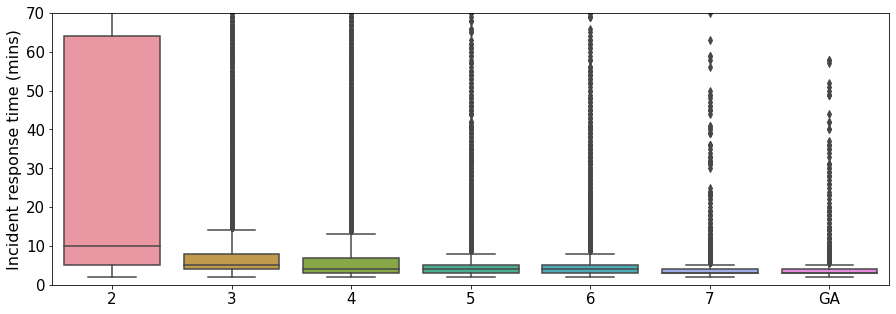

In [214]:

# plot the boxplot 
f, ax = plt.subplots(1, figsize=(15, 5))

## DISPATCH

ax = sns.boxplot(data=df3, ax = ax)


#f.suptitle('Distribution of incident travel times with various values of time saving threshold for redispatching on the fly', fontsize=20)


ax.set_xticklabels(ax.get_xticklabels(),rotation=0,  fontsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.set(xlabel=None)


ax.set_ylabel('Incident response time (mins)', fontsize = 16)


ax.set_ylim(0,70)

#plt.savefig('../Images/SA_timeSaving.png', bbox_inches = 'tight')


plt.show()

Obviously, we prefer to explore much more in the beginning of the search process (to ensure the population coverage and diversity). On the other hand, we prefer more exploitations at the end of search process to ensure the convergence of the population to the global optimum. 

There is just an exception; when population converges to a local optimum, we should (if we can) increase the population diversity to explore other areas.
According to the above facts, too high mutation rate increases the probability of searching more areas in search space, however, prevents population to converge to any optimum solution. On the other hand, too small mutation rate may result to premature convergence (falling to local optima instead of global optimum).In other words, too high mutation rate reduces the search ability of GA to a simple (and dummy!) random walk while a too small GA (without any other facilities such as niching or crowd-avoiding to preserve diversity) almost always fails to a local optimum.

We previously showed with the Baseline strategies that, on the testing set at least (2018), 
- 5 agents is enough for dispatch times. Basically there should not be any drive towards 7 agent strategies.
- 7 agents is better for travel time when using P idle strategy (not by much though). 7P strategy is better than 5P. There should be a drive towards 7P strategies above 5P.

So we should see a drive towards 7P strategies. But at the moment it seams to settles for 5P. It could be because


The GA learns from gen 5 onwards that Ph is the best idle strategy but struggles more to understand that 7 agents is better.

In [ ]:
Test that my GA 
- has no drive to have 7 agents but 5 agents if dispatch time is the metric.



## Plot history genealogy tree

In [96]:
# import pygraphviz as pgv
# [...] Execution of code that produce a tree expression
#nodes, edges, labels = graph(expr)
# g = pgv.AGraph()
# g.add_nodes_from(nodes)
# g.add_edges_from(edges)
# g.layout(prog="dot")
# for i in nodes:
    # n = g.get_node(i)
    # n.attr["label"] = labels[i]
# g.draw("tree.pdf")

In [97]:
# import pylab as plt
# from networkx.drawing.nx_agraph import graphviz_layout
# Plot genealogy tree
# plt.figure(figsize=(5,5))
# graph = nx.DiGraph(history.genealogy_tree)
# graph = graph.reverse()     # Make the graph top-down
#nx.draw_graphviz(G, cmap=plt.cm.Blues,node_color=range(len(G)),prog='dot')

# nx.draw(graph, pos=graphviz_layout(graph), cmap=plt.cm.Blues,node_color=range(len(graph)),prog='dot')

#colors = [toolbox.evaluate(history.genealogy_history[i])[0] for i in graph]
#nx.draw(graph, node_color=colors)
# plt.title('Genealogy tree')
# plt.show()
# plt.savefig("Genealogy_tree.png")

In [98]:
# Plot genealogy tree
# plt.figure(figsize=(5,5))
# graph = nx.DiGraph(history.genealogy_tree)
# graph = graph.reverse()     # Make the graph top-down
# colors = [toolbox.evaluate(history.genealogy_history[i])[0] for i in graph]
# nx.draw(graph, node_color=colors)
# plt.title('Genealogy tree')
# plt.show()
# plt.savefig("Genealogy_tree.png")

In [20]:
import geopandas as gpd
import pandas as pd
# Get the dictionnary of hot streets in districts of Detroit
PS = gpd.read_file('../Data/Police_stations.csv')


PS.Latitude = pd.to_numeric(PS['Latitude'],errors='coerce')
PS.Longitude = pd.to_numeric(PS['Longitude'],errors='coerce')

PS['geometry']=gpd.points_from_xy(PS.Longitude, PS.Latitude)

In [21]:
PS.head(2)

,the_geom,Precinct,Address,City,State,Zip,Leadership,Phone,Latitude,Longitude,NPO,geometry
0,POINT (-83.03652787242663 42.329384101120404),Downtown Services,20 Atwater Street,Detroit,MI,48226,Captain Conway Petty,(313) 237-2850,42.329382,-83.036531,Officer Angela Hollis (313)590-0186 & Officer ...,POINT (-83.03653 42.32938)
1,POINT (-83.18001577275903 42.38555613448372),2nd,13530 Lesure Street,Detroit,MI,48227,Commander Mounsey,(313) 596-5200,42.385557,-83.180014,Officer Burks Collette Burks (313)600-5756 & O...,POINT (-83.18001 42.38556)


## Num_vehicles per station barplot vizualisation

In [22]:
df_logbook = pd.DataFrame(logbook)
df_logbook.head()

,gen,nevals,hof,time
0,0,40,"[4, 4, 4, 6, 5, 2, 5, 5, 4, 5, 5, 2, P]",2020-10-31 18:33:56.850074
1,1,40,"[7, 4, 4, 6, 4, 7, 6, 7, 6, 4, 7, 5, P]",2020-10-31 18:45:57.773930
2,2,40,"[4, 3, 6, 2, 4, 6, 5, 6, 7, 4, 6, 4, P]",2020-10-31 18:58:45.962955
3,3,40,"[4, 3, 6, 2, 4, 6, 5, 6, 7, 4, 6, 4, P]",2020-10-31 19:12:55.970085
4,4,40,"[4, 3, 6, 2, 4, 6, 5, 6, 7, 4, 6, 4, P]",2020-10-31 19:29:35.065314


In [33]:
num_stations = len(PS)
df2 = pd.DataFrame([element[:-1] for element in df_logbook["hof"].tolist()], 
                   columns=['Station {}'.format(i) for i in range(1, num_stations+1)])
df2['gen'] = df2.index
df2.head()

,Station 1,Station 2,Station 3,Station 4,Station 5,Station 6,Station 7,Station 8,Station 9,Station 10,Station 11,Station 12,gen
0,4,4,4,6,5,2,5,5,4,5,5,2,0
1,7,4,4,6,4,7,6,7,6,4,7,5,1
2,4,3,6,2,4,6,5,6,7,4,6,4,2
3,4,3,6,2,4,6,5,6,7,4,6,4,3
4,4,3,6,2,4,6,5,6,7,4,6,4,4


In [34]:
colors = colors = dict(zip(
    ['Station {}'.format(i) for i in range(1, num_stations+1)],
    sns.color_palette('pastel', num_stations).as_hex()
))
colors

{'Station 1': '#a1c9f4',
 'Station 2': '#ffb482',
 'Station 3': '#8de5a1',
 'Station 4': '#ff9f9b',
 'Station 5': '#d0bbff',
 'Station 6': '#debb9b',
 'Station 7': '#fab0e4',
 'Station 8': '#cfcfcf',
 'Station 9': '#fffea3',
 'Station 10': '#b9f2f0',
 'Station 11': '#a1c9f4',
 'Station 12': '#ffb482'}

In [35]:
df_melt = df2.melt(id_vars='gen')
df_melt.head()

,gen,variable,value
0,0,Station 1,4
1,1,Station 1,7
2,2,Station 1,4
3,3,Station 1,4
4,4,Station 1,4


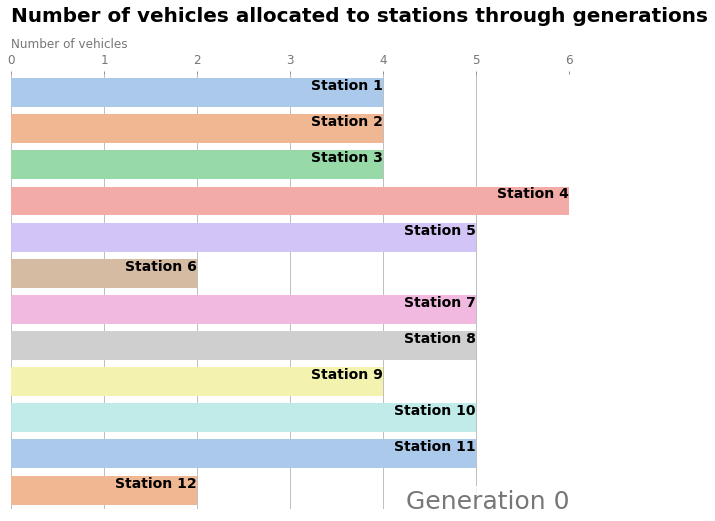

In [36]:
# Fixed potiion for stations

def draw_barchart_static(gen):
    fig, ax = plt.subplots(figsize=(10, 8))
    dff = df_melt[df_melt.gen == gen]
    ax.clear()
    ax = sns.barplot(x="value", y="variable", palette = colors,  data=dff)
    # Remove labels.
    ax.set_ylabel('')    
    ax.set_xlabel('')
    #ax.barh(dff['variable'], dff['value'], color = dff['value'])
    for i, (value, name) in enumerate(zip(dff['value'], dff['variable'])):
        ax.text(value, i,     name,           size=14, weight=600, ha='right', va='bottom')
        #ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    # Gen number
    #ax.text(1, 0.4, gen, transform=ax.transAxes, color='#777777', size=35, ha='right', weight=800)
    # Axis title
    ax.text(0, 1.06, 'Number of vehicles', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Number of vehicles allocated to stations through generations',
            transform=ax.transAxes, size=20, weight=600, ha='left')
    ax.text(1, 0, 'Generation {}'.format(gen), transform=ax.transAxes, size=25, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart_static(0)

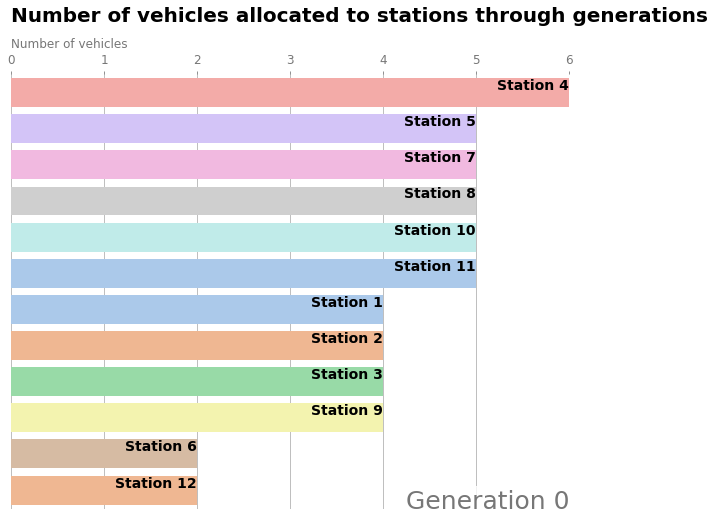

In [37]:
# Race: moving positions for stations (ordered by decreasing)

def draw_barchart_ordered(gen):
    fig, ax = plt.subplots(figsize=(10, 8))
    dff = df_melt[df_melt.gen == gen].sort_values(by='value', ascending=False)
    ax.clear()
    ax = sns.barplot(x="value", y="variable", palette = colors,  data=dff)
    # Remove labels.
    ax.set_ylabel('')    
    ax.set_xlabel('')
    #ax.barh(dff['variable'], dff['value'], color = dff['value'])
    for i, (value, name) in enumerate(zip(dff['value'], dff['variable'])):
        ax.text(value, i,     name,           size=14, weight=600, ha='right', va='bottom')
        #ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    # Gen number
    #ax.text(1, 0.4, gen, transform=ax.transAxes, color='#777777', size=35, ha='right', weight=800)
    # Axis title
    ax.text(0, 1.06, 'Number of vehicles', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Number of vehicles allocated to stations through generations',
            transform=ax.transAxes, size=20, weight=600, ha='left')
    ax.text(1, 0, 'Generation {}'.format(gen), transform=ax.transAxes, size=25, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart_ordered(0)

In [38]:

import numpy as np

def fig2array(fig):
    """a Matplotlib figure to a 3D numpy array with RGB channels and return it
    @param fig a matplotlib figgenturn a numpy 3D array of RGB values
    """
    # draw the renderer
    fig.canvas.draw ()
    
    #  fhue = 'variable', rom the fipalette = colorsig.canvas.get_width_height()
    w,h = fig.canvas.get_width_height()
    buf = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    
    # Reshape
    buf.shape = (h, w,3)

    return buf

def draw_barchart_anim_static(gen):
    fig, ax = plt.subplots(figsize=(15, 8))
    dff = df_melt[df_melt.gen == gen]
    ax.clear()
    ax = sns.barplot(x="value", y="variable", palette = colors, data=dff)
    # Remove labels.
    ax.set_ylabel('')    
    ax.set_xlabel('')
    #ax.barh(dff['variable'], dff['value'], color = dff['value'])
    dx = dff['value'].max() / 200 
    for i, (value, name) in enumerate(zip(dff['value'], dff['variable'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        #ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    # Gen number
    #ax.text(1, 0.4, gen, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    # Axis title
    ax.text(0, 1.06, 'Number of vehicles', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Number of vehicles allocated to stations through generations',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'Generation {}'.format(gen), transform=ax.transAxes, size=25, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

    image = fig2array (fig)

    plt.close()

    return image


def draw_barchart_anim_ordered(gen):
    fig, ax = plt.subplots(figsize=(15, 8))
    dff = df_melt[df_melt.gen == gen].sort_values(by='value', ascending=False)
    ax.clear()
    ax = sns.barplot(x="value", y="variable", palette = colors, data=dff)
    # Remove labels.
    ax.set_ylabel('')    
    ax.set_xlabel('')
    #ax.barh(dff['variable'], dff['value'], color = dff['value'])
    dx = dff['value'].max() / 200 
    for i, (value, name) in enumerate(zip(dff['value'], dff['variable'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        #ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    # Gen number
    #ax.text(1, 0.4, gen, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    # Axis title
    ax.text(0, 1.06, 'Number of vehicles', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Number of vehicles allocated to stations through generations',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'Generation {}'.format(gen), transform=ax.transAxes, size=25, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

    image = fig2array (fig)

    plt.close()

    return image


    

In [18]:
# Static
images = [draw_barchart_anim_static(gen) for gen in range(0,len(logbook))]

imageio.mimsave('Animated_GA_static.gif', images, duration = .5)

# Race
images = [draw_barchart_anim_ordered(gen) for gen in range(0,len(logbook))]

imageio.mimsave('Animated_GA_race.gif', images, duration = .5)

## Num_vehicules per station spatial vizualisation

In [19]:
# Save PS as geojson for map display
PS2 = PS.copy()
for log in logbook:
    PS2['num_veh_gen_{}'.format(log['gen'])] = log['hof']

PS2.head(3)


PS2.to_file('PS.geojson', driver='GeoJSON')

Tentative to display evolution of num_vehicules in Kepler over time

In [20]:
num_stations = len(PS)
df3 = pd.DataFrame(df_logbook["hof"].to_list(), columns=range(0, num_stations))
df3['time'] = df_logbook['time']
df3.head()

df_melt_time = df3.melt(id_vars='time')
df_melt_time = df_melt_time.rename(columns={"variable": "station", "value": "num_v"})
df_melt_time

,time,station,num_v
0,2020-08-16 12:09:11.363845,0,5
1,2020-08-16 12:12:50.955034,0,5
2,2020-08-16 12:16:28.234397,0,5
3,2020-08-16 12:20:07.423932,0,5
4,2020-08-16 12:24:03.706744,0,5
...,...,...,...
127,2020-08-16 12:30:02.807177,11,6
128,2020-08-16 12:32:25.273071,11,2
129,2020-08-16 12:35:37.403468,11,2
130,2020-08-16 12:39:20.650456,11,2


In [ ]:
PS3 = PS.copy()[['geometry', 'Latitude', 'Longitude', 'Precinct']]
PS3['station'] = PS3.index
PS_merged = pd.merge(PS3, df_melt_time, on='station')
PS_merged

In [ ]:
PS_merged.to_file('PS_evolution.geojson', driver='GeoJSON')

_____________________________________________________

In [24]:
import geopandas as gpd
# Get the dictionnary of hot streets in districts of Detroit
precincts = gpd.read_file('../../Data/DPD_Precincts/dpd_precincts.shp')
precincts.to_file('../../Data/precincts.geojson', driver='GeoJSON')


In [25]:
precincts.head(2)

,FID,shape_area,folderpath,oid_,popupinfo,name,extruded,clamped,symbolid,snippet,base,altmode,shape_leng,geometry
0,1,0.002958,2015 New Precincts Overlay/2015 Precincts,0,\n\n\n\n\n\n\n\n\n\n,10,0,-1,0,None,0,0,0.261169,"POLYGON ((-83.15714 42.40481, -83.14373 42.404..."
1,2,0.003420,2015 New Precincts Overlay/2015 Precincts,0,\n\n\n\n\n\n\n\n\n\n,09,0,-1,0,None,0,0,0.284669,"POLYGON ((-82.94093 42.44949, -82.94491 42.444..."


In [23]:
import datetime as dt

incidents = pd.read_csv("../../Data/Incidents.csv")
# only keep incidents of priority 1 for now 
incidents = incidents[incidents.Priority == 1]
        
start_datetime = dt.datetime(2019,1, 20, 16)
ABM_NUM_HOURS = 11
end_datetime = start_datetime + dt.timedelta(hours=ABM_NUM_HOURS)

# convert to timestamp
incidents['End_Call_Time']= pd.to_datetime(incidents['End_Call_Time'])
        
# select incidents for that 'date'
interval_data = incidents[(incidents['End_Call_Time'] >= start_datetime) & (incidents['End_Call_Time'] < end_datetime)]

interval_data.head(5)

,Incident ID,Agency,Incident Address,Zip Code,Priority,Call Code,Call Description,Category,Call Time,Time of Call,...,Detroit Neighborhoods,Scout Car Areas,Counties,Zip Codes,Date_Time,lat,lon,End_Call_Time,Testing_set,Precinct
71465,2.019020e+11,DPD,12800 block of ESSEX AVE,48215,1.0,393010,DV F/A I/P-J/H,FA IP,01/21/2019 02:52:11 AM,2:52:11 AM,...,4.0,124.0,1345.0,19204.0,2019-01-21 02:52:11,42.36385,-82.94927,2019-01-21 02:54:05,0,5
71467,2.019020e+11,DPD,1900 block of CHENE CT,48207,1.0,397010,DV A/B I/P-J/H,DV A/B,01/21/2019 02:48:59 AM,2:48:59 AM,...,67.0,49.0,1345.0,15561.0,2019-01-21 02:48:59,42.34588,-83.02769,2019-01-21 02:52:41,1,7
71470,2.019020e+11,DPD,15400 block of SCHOOLCRAFT ST,48227,1.0,GL8738,PERSON WITH WEAPON,WEAPON,01/21/2019 02:46:59 AM,2:46:59 AM,...,193.0,6.0,1345.0,20015.0,2019-01-21 02:46:59,42.38707,-83.19754,2019-01-21 02:49:59,0,2
71474,2.019020e+11,DPD,2600 block of W BOSTON BLVD,48206,1.0,GL8777,DISTURBANCE,DISTURB,01/21/2019 02:32:36 AM,2:32:36 AM,...,150.0,78.0,1345.0,15552.0,2019-01-21 02:32:36,42.37779,-83.11291,2019-01-21 02:34:24,0,10
71477,2.019020e+11,DPD,19900 block of DEAN ST,48234,1.0,397010,DV A/B I/P-J/H,DV A/B,01/21/2019 02:28:15 AM,2:28:15 AM,...,153.0,114.0,1345.0,20020.0,2019-01-21 02:28:15,42.44145,-83.06262,2019-01-21 02:30:21,0,11


In [54]:
type(interval_data.Date_Time.iloc[0])

str

In [47]:
gdf = gpd.GeoDataFrame(
    interval_data, geometry=gpd.points_from_xy(interval_data.lat, interval_data.lon))

In [49]:
gdf.to_file('interval_data.geojson', driver='GeoJSON')

## Stochasticity in runs

Compare best fitness graph between different instanciations (parameters). See if the spike in improvement comes earlier or later.

Plot histogram of number of runs ending with particular good values of fitness.

Plot the average final fitness value of runs when a given parameter increases or decreses. Exampleof parameters: size of tournament k, or pm (proba of mutation), pc (proba of crossover).

https://deap.readthedocs.io/en/master/tutorials/basic/part3.html